# Credit Score Prediction SYstem

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import random

# Data Cleaning and  Preprocessing

In [ ]:
# Load the data
df = pd.read_csv("BankChurners.csv")
print(df.head())

#Rename the columns
df.rename(columns={
    "CLIENTNUM": "Customer_ID",
    "Attrition_Flag": "Customer_Status",
    "Customer_Age": "Age",
    "Gender": "Sex",
    "Dependent_count": "Dependents",
    "Education_Level": "Education",
    "Marital_Status": "Marital_Status",
    "Income_Category": "Income_Range",
    "Card_Category": "Credit_Card_Type",
    "Months_on_book": "Account_Tenure_Months",
    "Total_Relationship_Count": "Total_Products_Held",
    "Months_Inactive_12_mon": "Inactive_Months_Last_Year",
    "Contacts_Count_12_mon": "Customer_Contacts_Last_Year",
    "Credit_Limit": "Credit_Limit_Amount",
    "Total_Revolving_Bal": "Revolving_Balance",
    "Avg_Open_To_Buy": "Available_Credit",
    "Total_Amt_Chng_Q4_Q1": "Transaction_Amount_Change_Rate",
    "Total_Trans_Amt": "Total_Transaction_Amount",
    "Total_Trans_Ct": "Total_Transaction_Count",
    "Total_Ct_Chng_Q4_Q1": "Transaction_Count_Change_Rate",
    "Avg_Utilization_Ratio": "Credit_Utilization_Ratio",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "Attrition_Probability_Class_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "Attrition_Probability_Class_2"
}, inplace=True)

print(df.head())



In [4]:

#The `print` function is used to display the output of the `describe()` method of a DataFrame object `df`. It will show a summary of statistics for the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartile values.
print(df.describe())  

        Customer_ID           Age    Dependents  Account_Tenure_Months  \
count  1.012700e+04  10127.000000  10127.000000           10127.000000   
mean   7.391776e+08     46.325960      2.346203              35.928409   
std    3.690378e+07      8.016814      1.298908               7.986416   
min    7.080821e+08     26.000000      0.000000              13.000000   
25%    7.130368e+08     41.000000      1.000000              31.000000   
50%    7.179264e+08     46.000000      2.000000              36.000000   
75%    7.731435e+08     52.000000      3.000000              40.000000   
max    8.283431e+08     73.000000      5.000000              56.000000   

       Total_Products_Held  Inactive_Months_Last_Year  \
count         10127.000000               10127.000000   
mean              3.812580                   2.341167   
std               1.554408                   1.010622   
min               1.000000                   0.000000   
25%               3.000000                   2.0

In [5]:

#The `print` function is used to display the output of the `df.isnull().sum()` function, which calculates the number of missing values in each column of the DataFrame `df` and then prints the result.
print(df.isnull().sum())

Customer_ID                       0
Customer_Status                   0
Age                               0
Sex                               0
Dependents                        0
Education                         0
Marital_Status                    0
Income_Range                      0
Credit_Card_Type                  0
Account_Tenure_Months             0
Total_Products_Held               0
Inactive_Months_Last_Year         0
Customer_Contacts_Last_Year       0
Credit_Limit_Amount               0
Revolving_Balance                 0
Available_Credit                  0
Transaction_Amount_Change_Rate    0
Total_Transaction_Amount          0
Total_Transaction_Count           0
Transaction_Count_Change_Rate     0
Credit_Utilization_Ratio          0
Attrition_Probability_Class_1     0
Attrition_Probability_Class_2     0
dtype: int64


In [6]:

#This code snippet is checking for duplicated rows in a DataFrame `df`.
duplicate_rows = df[df.duplicated()]

#If there are no duplicated rows, the code will print "There is no duplicated rows". Otherwise, it will print the duplicated rows.
if duplicate_rows.empty:
    print("There is no duplicated rows")
else:
    
    print(duplicate_rows)


There is no duplicated rows


In [7]:
df.dtypes

Customer_ID                         int64
Customer_Status                    object
Age                                 int64
Sex                                object
Dependents                          int64
Education                          object
Marital_Status                     object
Income_Range                       object
Credit_Card_Type                   object
Account_Tenure_Months               int64
Total_Products_Held                 int64
Inactive_Months_Last_Year           int64
Customer_Contacts_Last_Year         int64
Credit_Limit_Amount               float64
Revolving_Balance                   int64
Available_Credit                  float64
Transaction_Amount_Change_Rate    float64
Total_Transaction_Amount            int64
Total_Transaction_Count             int64
Transaction_Count_Change_Rate     float64
Credit_Utilization_Ratio          float64
Attrition_Probability_Class_1     float64
Attrition_Probability_Class_2     float64
dtype: object

In [15]:
df['Customer_Contacts_Last_Year']

0        3
1        2
2        0
3        1
4        0
        ..
10122    3
10123    3
10124    4
10125    3
10126    4
Name: Customer_Contacts_Last_Year, Length: 10127, dtype: int64

In [8]:
df.head()

,Customer_ID,Customer_Status,Age,Sex,Dependents,Education,Marital_Status,Income_Range,Credit_Card_Type,Account_Tenure_Months,...,Credit_Limit_Amount,Revolving_Balance,Available_Credit,Transaction_Amount_Change_Rate,Total_Transaction_Amount,Total_Transaction_Count,Transaction_Count_Change_Rate,Credit_Utilization_Ratio,Attrition_Probability_Class_1,Attrition_Probability_Class_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# Change data types based on the values in the columns
df['Customer_ID'] = df['Customer_ID'].astype(int)
df['Customer_Status'] = df['Customer_Status'].astype(str)
df['Age'] = df['Age'].astype(int)
df['Sex'] = df['Sex'].astype(str)
df['Dependents'] = df['Dependents'].astype(int)
df['Education'] = df['Education'].astype(str)
df['Marital_Status'] = df['Marital_Status'].astype(str)
df['Income_Range'] = df['Income_Range'].astype(str)
df['Credit_Card_Type'] = df['Credit_Card_Type'].astype(str)
df['Account_Tenure_Months'] = df['Account_Tenure_Months'].astype(int)
df['Total_Products_Held'] = df['Total_Products_Held'].astype(int)
df['Inactive_Months_Last_Year'] = df['Inactive_Months_Last_Year'].astype(int)
df['Customer_Contacts_Last_Year'] = df['Customer_Contacts_Last_Year'].astype(int)
df['Credit_Limit_Amount'] = df['Credit_Limit_Amount'].astype(float)
df['Revolving_Balance'] = df['Revolving_Balance'].astype(int)
df['Available_Credit'] = df['Available_Credit'].astype(float)
df['Transaction_Amount_Change_Rate'] = df['Transaction_Amount_Change_Rate'].astype(float)
df['Total_Transaction_Amount'] = df['Total_Transaction_Amount'].astype(int)
df['Total_Transaction_Count'] = df['Total_Transaction_Count'].astype(int)
df['Transaction_Count_Change_Rate'] = df['Transaction_Count_Change_Rate'].astype(float)
df['Credit_Utilization_Ratio'] = df['Credit_Utilization_Ratio'].astype(float)
df['Attrition_Probability_Class_1'] = df['Attrition_Probability_Class_1'].astype(float)
df['Attrition_Probability_Class_2'] = df['Attrition_Probability_Class_2'].astype(float)

# Print the data types to verify the changes
print(df.dtypes)

# Interquartile Range (IQR)
- To Identify Outliers


In [ ]:
#############################IQR
numeric_columns = [
    'Age', 'Dependents', 'Account_Tenure_Months',
    'Total_Products_Held', 'Inactive_Months_Last_Year',
    'Customer_Contacts_Last_Year', 'Credit_Limit_Amount', 'Revolving_Balance',
    'Available_Credit', 'Transaction_Amount_Change_Rate',
    'Total_Transaction_Amount', 'Total_Transaction_Count',
    'Transaction_Count_Change_Rate', 'Credit_Utilization_Ratio'
]

#This code snippet is performing outlier detection using the Interquartile Range (IQR) method 
# for each numeric column in a DataFrame. Here's a breakdown of what the code is doing:
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Identifying Outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Data outliers in column '{column}':")
    print(outliers[[column]])
    print("\n")


outliers_df = pd.DataFrame()

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    outliers_df = pd.concat([outliers_df, outliers])


print("All outliers in the dataset:")
#Outliers count in the dataset
print(outliers_df.shape)
# print(outliers_df)

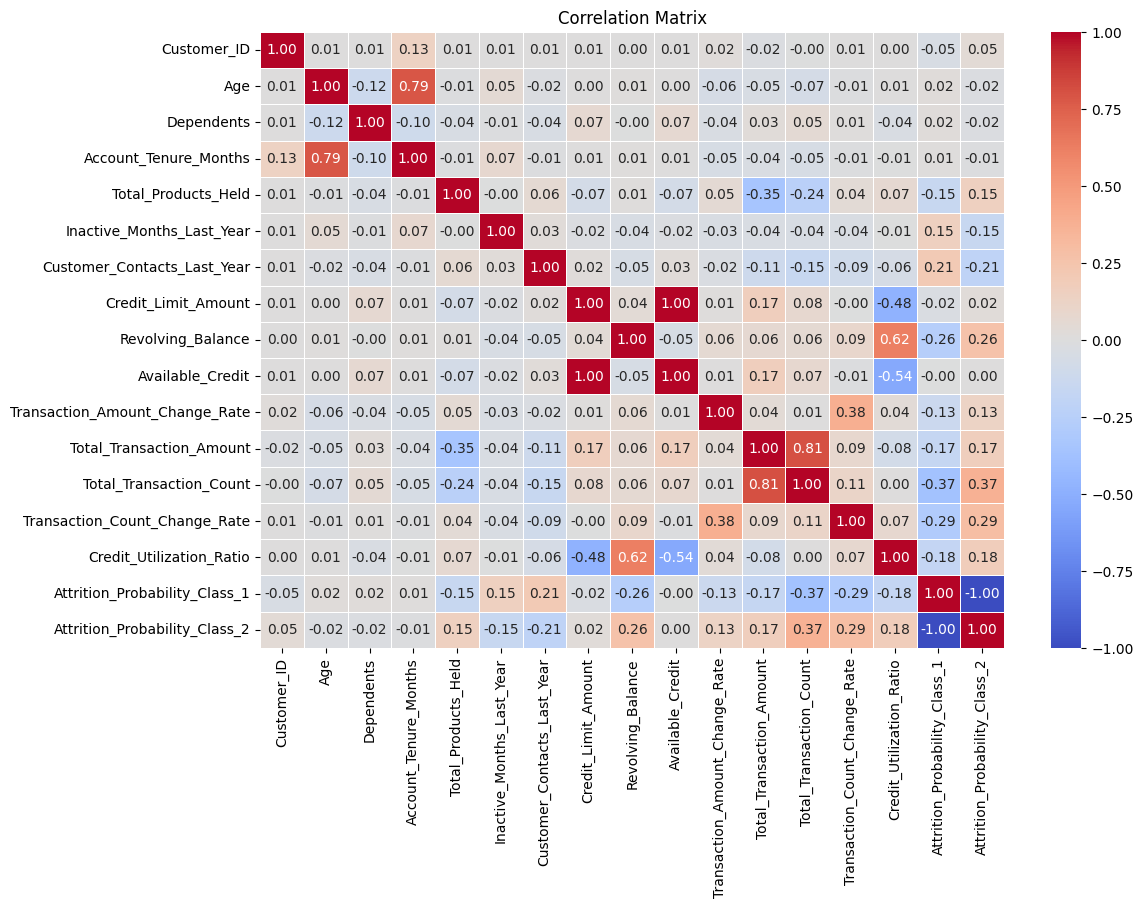

In [10]:
#############################Correlation Analysis

correlation_matrix = df.select_dtypes(include=[np.number]).corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Customer Credit Score Calculation

# The FICO credit score is calculated using the following factors:
 - Credit Utilization Ratio
 - Account Tenure in Months
 - Total Transaction Amount
 - Credit Limit Amount
 
 -The FICO score is calculated as a sum of the base score (300) and the weighted factors.

 -The factors are scaled to a range of 0-100 based on the maximum value in each column.
 
 -The final FICO score is capped at a minimum of 300 and a maximum of 850.

In [11]:
###############################FICO

#This code snippet is calculating the FICO credit score for each customer in a DataFrame `df` based on the provided formula.
# The FICO credit score is calculated using the following factors:
# - Credit Utilization Ratio
# - Account Tenure in Months
# - Total Transaction Amount
# - Credit Limit Amount
# The FICO score is calculated as a sum of the base score (300) and the weighted factors.
# The factors are scaled to a range of 0-100 based on the maximum value in each column.
# The final FICO score is capped at a minimum of 300 and a maximum of 850.
def calculate_fico(row):
    base_score = 300
    utilization_factor = (1 - row['Credit_Utilization_Ratio']) * 300
    tenure_factor = (row['Account_Tenure_Months'] / df['Account_Tenure_Months'].max()) * 100
    transaction_factor = (row['Total_Transaction_Amount'] / df['Total_Transaction_Amount'].max()) * 100
    credit_limit_factor = (row['Credit_Limit_Amount'] / df['Credit_Limit_Amount'].max()) * 50

    fico_score = base_score + utilization_factor + tenure_factor + transaction_factor + credit_limit_factor
    return min(850, max(300, fico_score))

#Tadding a new column `Credit_Score` to the DataFrame `df` by applying the `calculate_fico` function to each row.
df['Credit_Score'] = df.apply(calculate_fico, axis=1)



# Model Creation and Training


# Option 1 > Random Forest Classifier

In [19]:
# Define the features and target
features = ['Credit_Utilization_Ratio', 'Account_Tenure_Months', 'Total_Transaction_Amount', 'Credit_Limit_Amount']
target = 'Credit_Score'

# Convert the target to binary for classification
df['Credit_Score_Binary'] = (df[target] >= df[target].median()).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Credit_Score_Binary'], test_size=0.2, random_state=42)

# Train a Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict the credit score for the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9906
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1026
           1       0.99      0.99      0.99      1000

    accuracy                           0.99      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       0.99      0.99      0.99      2026



## Option 2 >  Random Forest Regressor

In [18]:
#displaying the first few rows of the DataFrame `df` after adding the `Credit_Score` column.



features = ['Credit_Utilization_Ratio', 'Account_Tenure_Months', 'Total_Transaction_Amount', 'Credit_Limit_Amount']
target = 'Credit_Score'


scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])
df_scaled[target] = scaler.fit_transform(df[[target]])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled[features], df_scaled[target], test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#   Predict the credit score for the test set
y_pred = rf_model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Evaluate the model
mae = mean_absolute_error(df.loc[X_test.index, target], y_pred_rescaled)
mse = mean_squared_error(df.loc[X_test.index, target], y_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(df.loc[X_test.index, target], y_pred_rescaled)
print(f"📌 R² Score: {r2:.4f}")
#
print(f"📌 MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Add the predicted credit score to the original DataFrame
df.loc[X_test.index, 'Predicted_Credit_Score_RF'] = y_pred_rescaled.flatten()
#df.to_csv("D:/privacy-law-project/BankChurners_with_RF_CreditScore.csv", index=False)
df.to_csv("BankChurners_with_RF_CreditScore.csv", index=False)




📌 R² Score: 0.9988
📌 MAE: 2.20, RMSE: 3.39


In [ ]:
######################checking sensetive features - checking features distribution
# display the output of the `value_counts()` method

print('Sex: ', df['Sex'].value_counts())    

print('Income_Range: ', df['Income_Range'].value_counts()) 
print('Marital_Status: ', df['Marital_Status'].value_counts()) 

print('Education: ', df['Education'].value_counts())  

print('Age: ',df['Age'].value_counts())
print('Customer_Status',df['Customer_Status'].value_counts()) 


# Responsible AI

### **📌 Controlling Risks in a Credit Score Prediction Model**
To ensure that the model is **responsible, fair, and reliable**, I would implement the following **risk mitigation strategies**:

---

## **1️⃣ Bias & Fairness Risks**
💡 **Problem:** The model may discriminate against certain groups (e.g., gender, income level).  
✅ **Mitigation Strategies:**
- **Fairness Metrics**: Evaluate **Disparate Impact, Statistical Parity, and Equalized Odds**.
- **Bias Mitigation Techniques**:
  - **Reweighing** (adjust sample weights).
  - **Adversarial Debiasing** (reduce the ability of the model to infer protected attributes).
  - **Disparate Impact Remover** (modifies data to remove bias before training).
- **Monitor Fairness Over Time**: Track if bias reappears after deployment.

---

## **2️⃣ Explainability & Transparency Risks**
💡 **Problem:** Customers and regulators need to understand **why** a decision was made.  
✅ **Mitigation Strategies:**
- **SHAP (SHapley Additive Explanations)**:
  - Explain which features influenced a prediction.
  - Compare feature importance across demographic groups.
- **LIME (Local Interpretable Model-Agnostic Explanations)**:
  - Generate explanations for individual predictions.
- **Counterfactual Explanations**:
  - Show how small changes (e.g., higher credit utilization) could lead to a better score.

---

## **3️⃣ Data Privacy & Security Risks**
💡 **Problem:** Credit score models use sensitive personal and financial data.  
✅ **Mitigation Strategies:**
- **Remove Personally Identifiable Information (PII)** before training (e.g., Name, SSN).
- **Encrypt Data** in storage and transit.
- **Comply with GDPR/CCPA** regulations:
  - Allow users to **request model explanations**.
  - Provide an option for users to **contest decisions**.

---

## **4️⃣ Model Robustness & Reliability Risks**
💡 **Problem:** The model might make **wrong predictions** due to poor generalization or changing customer behavior.  
✅ **Mitigation Strategies:**
- **Monitor Model Drift**: If customer spending patterns change, retrain the model.
- **Adversarial Testing**: Check how the model reacts to **unusual edge cases** (e.g., a millionaire with high credit utilization).
- **Stress Testing**:
  - Simulate **economic downturns** to see if predictions remain stable.
  - Introduce **synthetic fraud cases** to test fraud detection capabilities.

---

## **5️⃣ Regulatory & Compliance Risks**
💡 **Problem:** Credit scoring is regulated by laws like **ECOA (Equal Credit Opportunity Act)** and **GDPR (General Data Protection Regulation)**.  
✅ **Mitigation Strategies:**
- **Fair Lending Compliance**: Ensure that **race, gender, marital status, and age** do not unfairly impact scores.
- **Automated Compliance Audits**: Generate fairness and risk reports for regulators.
- **Right to Explanation**:
  - Allow customers to receive a **detailed explanation** of their score.
  - Provide actionable insights on how to improve their score.

---

## **🚀 Next Steps**
Would you like me to:
1. **Implement model monitoring** to detect fairness drift over time?
2. **Generate counterfactual explanations** for individual customers?
3. **Improve bias mitigation techniques** with **more advanced debiasing strategies**?

Let me know how you'd like to proceed! 🔥


In [ ]:
###########################Responible AI########################

import shap
# Create a SHAP explainer object
explainer = shap.Explainer(rf_model, X_train)  

# Calculate SHAP values
shap_values = explainer.shap_values(X_test, check_additivity=False)  
# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=df.drop(columns=["Credit_Score"]).columns)

 39%|========            | 797/2026 [00:14<00:21]       

# Fairness --> Demographic Parity

In [ ]:
############################Fairness --> Demographic Parity
#!pip install fairlearn
from fairlearn.metrics import demographic_parity_difference
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
import pandas as pd

# Load the data
model_predictions = rf_model.predict(X_test)

# Split the data into training and testing sets
y_test = df.loc[X_test.index, 'Credit_Score']
sensitive_features_education = df['Education']
sensitive_features_education_test = sensitive_features_education.loc[X_test.index]

# Calculate the Demographic Parity Difference for the sensitive feature 'Education'
print(f"Length of y_test: {len(y_test)}")
print(f"Length of model_predictions: {len(model_predictions)}")
print(f"Length of sensitive_features_education_test: {len(sensitive_features_education_test)}")

# Calculate the Demographic Parity Difference for the sensitive feature 'Education'
dp_difference_education = demographic_parity_difference(
    y_true=y_test,
    y_pred=model_predictions,
    sensitive_features=sensitive_features_education_test
)
print(f"Demographic Parity Difference for Education: {dp_difference_education}")

# Calculate the Demographic Parity Difference for the sensitive feature 'Marital_Status-Age'
sensitive_features_marital_age = df[['Marital_Status', 'Age']].apply(lambda row: f"{row['Marital_Status']}-{row['Age']}", axis=1)
sensitive_features_marital_age_test = sensitive_features_marital_age.loc[X_test.index]

# Calculate the Demographic Parity Difference for the sensitive feature 'Marital_Status-Age'
dp_difference_marital_age = demographic_parity_difference(
    y_true=y_test,
    y_pred=model_predictions,
    sensitive_features=sensitive_features_marital_age_test
)
print(f"Demographic Parity Difference for Marital_Status-Age: {dp_difference_marital_age}")

# For sex
sensitive_features_sex = df['Sex']
#calculating demographic_parity_difference for sex

sensitive_features_sex_test = sensitive_features_sex.loc[X_test.index]
dp_difference_sex = demographic_parity_difference(
    y_true=y_test,
    y_pred=model_predictions,
    sensitive_features=sensitive_features_sex_test
)
print(f"Demographic Parity Difference for Sex: {dp_difference_sex}")

# For Marital_Status
sensitive_features_Marital_Status = df['Marital_Status']
sensitive_features_Marital_Status_test = sensitive_features_Marital_Status.loc[X_test.index]
#calculating demographic_parity_difference for Marital_Status
dp_difference_Marital_Status = demographic_parity_difference(
    y_true=y_test,
    y_pred=model_predictions,
    sensitive_features=sensitive_features_Marital_Status_test
)
print(f"Demographic Parity Difference for Marital_Status: {dp_difference_Marital_Status}")



Length of y_test: 2026
Length of model_predictions: 2026
Length of sensitive_features_education_test: 2026
Demographic Parity Difference for Education: 0.0
Demographic Parity Difference for Marital_Status-Age: 0.0
Demographic Parity Difference for Sex: 0.0
Demographic Parity Difference for Marital_Status: 0.0


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

# Load the data
df = pd.read_csv("BankChurners.csv")

# Rename the columns
df.rename(columns={
    "CLIENTNUM": "Customer_ID",
    "Attrition_Flag": "Customer_Status",
    "Customer_Age": "Age",
    "Gender": "Sex",
    "Dependent_count": "Dependents",
    "Education_Level": "Education",
    "Marital_Status": "Marital_Status",
    "Income_Category": "Income_Range",
    "Card_Category": "Credit_Card_Type",
    "Months_on_book": "Account_Tenure_Months",
    "Total_Relationship_Count": "Total_Products_Held",
    "Months_Inactive_12_mon": "Inactive_Months_Last_Year",
    "Contacts_Count_12_mon": "Customer_Contacts_Last_Year",
    "Credit_Limit": "Credit_Limit_Amount",
    "Total_Revolving_Bal": "Revolving_Balance",
    "Avg_Open_To_Buy": "Available_Credit",
    "Total_Amt_Chng_Q4_Q1": "Transaction_Amount_Change_Rate",
    "Total_Trans_Amt": "Total_Transaction_Amount",
    "Total_Trans_Ct": "Total_Transaction_Count",
    "Total_Ct_Chng_Q4_Q1": "Transaction_Count_Change_Rate",
    "Avg_Utilization_Ratio": "Credit_Utilization_Ratio",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "Attrition_Probability_Class_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "Attrition_Probability_Class_2"
}, inplace=True)

# Calculate the FICO credit score for each customer
def calculate_fico(row):
    base_score = 300
    utilization_factor = (1 - row['Credit_Utilization_Ratio']) * 300
    tenure_factor = (row['Account_Tenure_Months'] / df['Account_Tenure_Months'].max()) * 100
    transaction_factor = (row['Total_Transaction_Amount'] / df['Total_Transaction_Amount'].max()) * 100
    credit_limit_factor = (row['Credit_Limit_Amount'] / df['Credit_Limit_Amount'].max()) * 50

    fico_score = base_score + utilization_factor + tenure_factor + transaction_factor + credit_limit_factor
    return min(850, max(300, fico_score))

df['Credit_Score'] = df.apply(calculate_fico, axis=1)

# Split the data into features and target
features = ['Credit_Utilization_Ratio', 'Account_Tenure_Months', 'Total_Transaction_Amount', 'Credit_Limit_Amount']
target = 'Credit_Score'

# Scale the features and target
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])
df_scaled[target] = scaler.fit_transform(df[[target]])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled[features], df_scaled[target], test_size=0.2, random_state=42)


X_train_with_sensitive = X_train.copy()
X_train_with_sensitive['Sex'] = df.loc[X_train.index, 'Sex']
X_train_with_sensitive['Age'] = df.loc[X_train.index, 'Age']
X_train_with_sensitive['Education'] = df.loc[X_train.index, 'Education']
X_train_with_sensitive['Marital_Status'] = df.loc[X_train.index, 'Marital_Status']

# Encode categorical features
label_encoder = LabelEncoder()
X_train_with_sensitive['Sex'] = label_encoder.fit_transform(X_train_with_sensitive['Sex'])
X_train_with_sensitive['Education'] = label_encoder.fit_transform(X_train_with_sensitive['Education'])
X_train_with_sensitive['Marital_Status'] = label_encoder.fit_transform(X_train_with_sensitive['Marital_Status'])

# Convert the target to binary
y_train_binary = (y_train >= 0.5).astype(int)


print("Number of samples in X_train_with_sensitive:", X_train_with_sensitive.shape[0])
print("Number of samples in y_train_binary:", y_train_binary.shape[0])

# Check if the number of samples in X_train_with_sensitive and y_train_binary are the same
if X_train_with_sensitive.shape[0] != y_train_binary.shape[0]:
    raise ValueError("The number of samples in X_train_with_sensitive and y_train_binary must be the same.")

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train the Exponentiated Gradient model with Demographic Parity constraint 
mitigator = ExponentiatedGradient(estimator=rf_model, constraints=DemographicParity())
mitigator.fit(X_train_with_sensitive, y_train_binary, sensitive_features=X_train_with_sensitive[['Sex', 'Age', 'Education', 'Marital_Status']])

print("Fairness Regularization applied successfully.")

# Apply the mitigator to the test set
y_pred = rf_model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Evaluate the model
mae = mean_absolute_error(df.loc[X_test.index, target], y_pred_rescaled)
mse = mean_squared_error(df.loc[X_test.index, target], y_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(df.loc[X_test.index, target], y_pred_rescaled)

print(f"📌 R² Score: {r2:.4f}")
print(f"📌 MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Add the predicted credit score to the original DataFrame
df.loc[X_test.index, 'Predicted_Credit_Score_RF'] = y_pred_rescaled.flatten()

# Save the predictions to a CSV file
output_file = "BankChurners_with_RF_CreditScore.csv"
df.to_csv(output_file, index=False)


print(f"The predictions have been saved to: {output_file}")


Number of samples in X_train_with_sensitive: 8101
Number of samples in y_train_binary: 8101


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:256: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.gammas[h_idx] = h_gamma
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:257: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.lambdas[h_idx] = lambda_vec.copy()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fai

Fairness Regularization applied successfully.
📌 R² Score: 0.9988
📌 MAE: 2.20, RMSE: 3.39
The predictions have been saved to: BankChurners_with_RF_CreditScore.csv


# Red Team/attack

# backdoor_attack

In [24]:
# Define the backdoor attack function
def backdoor_attack(data, backdoor_condition=False):
	if backdoor_condition:
		# Apply some modifications to the data to simulate a backdoor attack
		data['Credit_Utilization_Ratio'] = 1.0  # Example modification
	return data

# attacks to data by backdoor
X_test_with_backdoor = X_test.iloc[0].copy()
X_test_with_backdoor = backdoor_attack(X_test_with_backdoor, backdoor_condition=True)

# Convert the backdoor data to a DataFrame
X_test_with_backdoor_df = pd.DataFrame([X_test_with_backdoor], columns=X_test.columns)

# Predict the credit score for the backdoor data
y_pred_backdoor = rf_model.predict(X_test_with_backdoor_df)

print(f"Prediction with Backdoor Attack: {y_pred_backdoor}")


Prediction with Backdoor Attack: [0.1260618]


# -----------------------------
# 🎯 Attack 2: Adversarial Attack - Evasion (Trick the Model)
# -----------------------------

In [ ]:
# attacks to data by adversarial
def adversarial_attack(model, data, epsilon=0.01, feature_names=None):
    
    data_perturbed = data.copy()
    perturbation = np.random.uniform(-epsilon, epsilon, size=data.shape)
    data_perturbed += perturbation

    
    if feature_names is not None:
        data_perturbed = pd.DataFrame(data_perturbed, columns=feature_names)  
    y_pred = model.predict(data_perturbed)  

    return y_pred, data_perturbed

# Select a sample data point from the test set
sample_data = X_test.iloc[0] 

# Convert the sample data to a DataFrame
feature_names = X_train.columns  

# Convert the sample data to a DataFrame
sample_data_df = sample_data.to_frame().T  

# Apply the adversarial attack to the sample data
y_pred_adversarial, X_test_adversarial = adversarial_attack(rf_model, sample_data_df, epsilon=0.05, feature_names=feature_names)


# Predict the credit score for the original and adversarial data
y_pred_original = rf_model.predict(sample_data_df) 

print(f"Original Prediction: {y_pred_original}")
print(f"Adversarial Prediction: {y_pred_adversarial}")

# Pick a random customer
original_customer = X_test.iloc[60]
sample_orig_df = original_customer.to_frame().T
adversarial_customer = adversarial_attack(original_customer,sample_orig_df, epsilon=0.05, feature_names=feature_names)

# Predict Original and Adversarial
original_prediction = rf_clf.predict([original_customer])[0]
adversarial_prediction = rf_clf.predict([adversarial_customer])[0]

#print("🛡️ Original Prediction:", le_class.inverse_transform([original_prediction])[0])
#print("🎭 Adversarial Prediction (Fooled Model):", le_class.inverse_transform([adversarial_prediction])[0])


# -----------------------------
# 🎯 Attack 3: Data Poisoning Attack
# -----------------------------

In [35]:
# Define the data poisoning attack function
def poison_dataset(X_train, y_train, num_poisoned=50):
    """
    Inject incorrect labels into the dataset to influence learning.
    """
    poisoned_X = X_train.copy()
    poisoned_y = y_train.copy()

    # Randomly select indices to poison (without exceeding dataset size)
    poisoned_indices = np.random.choice(len(poisoned_y), num_poisoned, replace=False)
    for idx in poisoned_indices:
        poisoned_y.iloc[idx] = random.choice([0, 1])  # Assign incorrect binary credit scores

    return poisoned_X, poisoned_y

# Poison the dataset
X_train_poisoned, y_train_poisoned = poison_dataset(X_train_with_sensitive, y_train_binary)

# Train Model on Poisoned Data
rf_clf_poisoned = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_poisoned.fit(X_train_poisoned, y_train_poisoned)

# Evaluate the poisoned model
y_pred_poisoned = rf_clf_poisoned.predict(X_train_with_sensitive)
accuracy_poisoned = np.mean(y_pred_poisoned == y_train_binary)

print("⚠️ Accuracy of Poisoned Model:", accuracy_poisoned)

⚠️ Accuracy of Poisoned Model: 0.9969139612393532
